### This Jupyter notebook is to show how pyUSCRN works.

#### Brief introduction to install pyUSCRN package.
--------------------------------------------

> python setup.py install

or

> python setup.py develop

> python -c "import pyUSCRN as pu; pu.intro()"

You will see:

```
################################################################################
Name: pyUSCRN
A python package to deal with the data from USCRN
Author: Kang Wang
University of Colorado Boulder
URL: https://github.com/wk1984/pyUSCRN/
################################################################################
```

#### Step 1: Import the packages we need.

In [1]:
import glob, os, datetime
import numpy as np
import matplotlib.pyplot as plt
import pyUSCRN as pu

#### Step 2: Select stations

In this case, we use a shape file ("Miss_RiverBasin/Miss_RiverBasin.shp") to define the region of interested.

We also plot the selected stations with an overlap layer of this shape file.

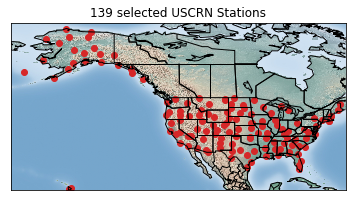

In [2]:
stn_list = pu.filter_stations()
pu.plot_map_selected_stations()

#### Step 3: Summarize number of stations from daily products.

In [3]:
stn_header, daily_data = pu.read_merge_sites_for_single_variable(stn_list.ID, 
                                                           DATES=['2000-01-01','2018-12-31'],
                                                           VARS = ['T_DAILY_AVG'],
                                              scale = 'daily')

merging (139) stations.........................................................................................................................................DONE


In [4]:
stn_header, daily_data_prec = pu.read_merge_sites_for_single_variable(stn_list.ID, 
                                                           DATES=['2000-01-01','2018-12-31'],
                                                           VARS = ['P_DAILY_CALC'],
                                              scale = 'daily')

merging (139) stations.........................................................................................................................................DONE


In [5]:
stn_header, daily_data_radi = pu.read_merge_sites_for_single_variable(stn_list.ID, 
                                                           DATES=['2000-01-01','2018-12-31'],
                                                           VARS = ['SOLARAD_DAILY'],
                                              scale = 'daily')

merging (139) stations.........................................................................................................................................DONE


In [6]:
stn_header, daily_data_RH = pu.read_merge_sites_for_single_variable(stn_list.ID, 
                                                           DATES=['2000-01-01','2018-12-31'],
                                                           VARS = ['RH_DAILY_AVG'],
                                              scale = 'daily')

merging (139) stations.........................................................................................................................................DONE


In [7]:
stn_header, daily_data_soil = pu.read_merge_sites_for_single_variable(stn_list.ID, 
                                                           DATES=['2000-01-01','2018-12-31'],
                                                           VARS = ['SOIL_TEMP_5_DAILY'],
                                              scale = 'daily')

merging (139) stations.........................................................................................................................................DONE


In [8]:
stn_header, daily_data_SM = pu.read_merge_sites_for_single_variable(stn_list.ID, 
                                                           DATES=['2000-01-01','2018-12-31'],
                                                           VARS = ['SOIL_MOISTURE_5_DAILY'],
                                              scale = 'daily')

merging (139) stations.........................................................................................................................................DONE


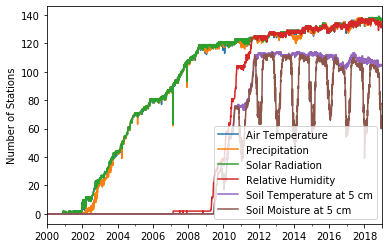

In [9]:
fig,ax = plt.subplots()
daily_data.count(axis=1).plot(legend=True, ax=ax, label = 'Air Temperature')
daily_data_prec.count(axis=1).plot(legend=True, ax=ax, label = 'Precipitation')
daily_data_radi.count(axis=1).plot(legend=True, ax=ax, label = 'Solar Radiation')
daily_data_RH.count(axis=1).plot(legend=True, ax=ax, label = 'Relative Humidity')
daily_data_soil.count(axis=1).plot(legend=True, ax=ax, label = 'Soil Temperature at 5 cm')
daily_data_SM.count(axis=1).plot(legend=True, ax=ax, label = 'Soil Moisture at 5 cm')
plt.ylabel('Number of Stations')
plt.savefig('Figure03.png', dpi=326, bbox_inches = 'tight')

In [10]:
pu.list_available_variables(scale='daily')

----------------------------------------
There are  28  variables [DAILY]
----------------------------------------
Variable                  | Unit      
----------------------------------------
WBANNO                    | 1         
LST_DATE                  | 1         
CRX_VN                    | 1         
LONGITUDE                 | 1         
LATITUDE                  | 1         
T_DAILY_MAX               | Celsius   
T_DAILY_MIN               | Celsius   
T_DAILY_MEAN              | Celsius   
T_DAILY_AVG               | Celsius   
P_DAILY_CALC              | mm per day
SOLARAD_DAILY             | Watt m^-2 
SUR_TEMP_DAILY_TYPE       | 1         
SUR_TEMP_DAILY_MAX        | Celsius   
SUR_TEMP_DAILY_MIN        | Celsius   
SUR_TEMP_DAILY_AVG        | Celsius   
RH_DAILY_MAX              | %         
RH_DAILY_MIN              | %         
RH_DAILY_AVG              | %         
SOIL_MOISTURE_5_DAILY     | m^3 m^-3  
SOIL_MOISTURE_10_DAILY    | m^3 m^-3  
SOIL_MOISTURE_20_DAILY   

In [14]:
test  = daily_data.resample('M', how='mean')

DataError: No numeric types to aggregate